In [6]:
from core import models
from core import data 
import utils 
import torch.nn as nn
import torch
import os
from tqdm import trange, tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data_dir = "../../siemese_data"
device = "cpu"
exp_dir = "../../siemese_test"

utils.prepare_directory(exp_dir)

In [3]:
logger_titles = [
        'lr',
        'train_loss',
        'val_loss',
        'train_top1',
        'val_top1',
        'train_time',
        'val_time']

In [4]:
criterion = nn.BCEWithLogitsLoss().to(device) 

In [5]:
datahandler = data.SiemeseDataHandler(data_dir)
trainloader, valloader = datahandler.get_dataloaders(batch_size=8)

10 validation split from training
83 training remains


In [6]:
valloader.dataset.data

{27: ['../../siemese_data/quetz/Screen Shot 2020-09-01 at 8.18.19 PM.png',
  '../../siemese_data/quetz/Screen Shot 2020-09-01 at 8.18.23 PM.png'],
 23: ['../../siemese_data/napoleon/Screen Shot 2020-08-27 at 12.55.24 PM.png'],
 11: ['../../siemese_data/ozy/Screen Shot 2020-08-27 at 12.53.16 PM.png'],
 25: ['../../siemese_data/king_hassan/Screen Shot 2020-09-01 at 8.15.21 PM.png'],
 4: ['../../siemese_data/xuanzang/Screen Shot 2020-09-01 at 8.15.03 PM.png'],
 18: ['../../siemese_data/raikou/Screen Shot 2020-08-19 at 5.42.02 PM.png'],
 26: ['../../siemese_data/tamamo/Screen Shot 2020-08-19 at 8.01.28 PM.png'],
 21: ['../../siemese_data/ishtar/Screen Shot 2020-08-27 at 12.52.01 PM.png'],
 8: ['../../siemese_data/circe/Screen Shot 2020-09-01 at 8.17.17 PM.png']}

In [7]:
# create the convnet and optimizer
model = models.SiameseNet()
lr = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [8]:
log_dir = os.path.join(exp_dir, "training_logs")
utils.prepare_directory(log_dir)
logger = utils.Logger(log_dir, 'logs', logger_titles)

In [9]:
#training loop
n_epochs = 20

best_top1 = 0 
best_confmat = None 
for epoch in trange(0, n_epochs, desc="epoch_monitor", dynamic_ncols=False):
    train_loss, train_top1, train_time = utils.siemese_train(model, trainloader, optimizer, criterion, device)
    val_loss, val_top1, confmat, val_time = utils.siemese_evaluate(model, valloader, criterion, device)
    
    is_best = best_top1 < val_top1
    if is_best:
        best_top1 = val_top1
        best_confmat = confmat
        
    utils.save_checkpoint({
        'model': model.state_dict(),
        'epoch': epoch, 
        'best_top1':best_top1,
        'val_top1':val_top1}, 
        exp_dir,
        is_best)
    
    logger.append(
            [lr, train_loss, val_loss,
            train_top1, val_top1,  
            train_time, val_time],
            epoch)

    print("train acc: {:.2f} train loss: {:.2f}  val loss: {:.2f} val acc: {:.2f}".format(train_top1, train_loss, val_loss, val_top1))

logger.close()

training loop:   0%|          | 0/83 [00:00<?, ?it/s]/Users/jasonzhang/opt/anaconda3/envs/taskTohsakaTorch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)

training loop: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]

epoch_monitor:   5%|▌         | 1/20 [00:54<17:06, 54.04s/it]

train acc: 0.69 train loss: 0.68  val loss: 0.66 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:41<00:00,  2.02it/s]

epoch_monitor:  10%|█         | 2/20 [01:48<16:16, 54.27s/it]

train acc: 0.72 train loss: 0.63  val loss: 0.53 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:40<00:00,  2.07it/s]

epoch_monitor:  15%|█▌        | 3/20 [02:41<15:15, 53.83s/it]

train acc: 0.78 train loss: 0.54  val loss: 0.39 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]

epoch_monitor:  20%|██        | 4/20 [03:36<14:26, 54.15s/it]

train acc: 0.75 train loss: 0.46  val loss: 0.43 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]

epoch_monitor:  25%|██▌       | 5/20 [04:30<13:34, 54.29s/it]

train acc: 0.81 train loss: 0.41  val loss: 0.39 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:42<00:00,  1.94it/s]

epoch_monitor:  30%|███       | 6/20 [05:26<12:47, 54.84s/it]

train acc: 0.88 train loss: 0.38  val loss: 0.48 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]

epoch_monitor:  35%|███▌      | 7/20 [06:21<11:51, 54.76s/it]

train acc: 0.93 train loss: 0.34  val loss: 0.52 val acc: 0.90



training loop: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]

epoch_monitor:  40%|████      | 8/20 [07:16<10:58, 54.85s/it]

train acc: 0.92 train loss: 0.40  val loss: 0.37 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:41<00:00,  2.00it/s]

epoch_monitor:  45%|████▌     | 9/20 [08:11<10:03, 54.90s/it]

train acc: 0.89 train loss: 0.37  val loss: 0.38 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:42<00:00,  1.94it/s]

epoch_monitor:  50%|█████     | 10/20 [09:07<09:13, 55.37s/it]

train acc: 0.90 train loss: 0.38  val loss: 0.37 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:42<00:00,  1.94it/s]

epoch_monitor:  55%|█████▌    | 11/20 [10:04<08:21, 55.75s/it]

train acc: 0.95 train loss: 0.28  val loss: 0.32 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:43<00:00,  1.91it/s]

epoch_monitor:  60%|██████    | 12/20 [11:01<07:29, 56.15s/it]

train acc: 0.98 train loss: 0.29  val loss: 0.81 val acc: 0.70



training loop: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]

epoch_monitor:  65%|██████▌   | 13/20 [11:56<06:30, 55.82s/it]

train acc: 0.98 train loss: 0.21  val loss: 0.43 val acc: 0.90



training loop: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]

epoch_monitor:  70%|███████   | 14/20 [12:51<05:33, 55.64s/it]

train acc: 0.95 train loss: 0.26  val loss: 0.39 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]

epoch_monitor:  75%|███████▌  | 15/20 [13:47<04:37, 55.57s/it]

train acc: 0.96 train loss: 0.31  val loss: 0.33 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:40<00:00,  2.03it/s]

epoch_monitor:  80%|████████  | 16/20 [14:41<03:40, 55.24s/it]

train acc: 0.98 train loss: 0.27  val loss: 0.39 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:42<00:00,  1.95it/s]

epoch_monitor:  85%|████████▌ | 17/20 [15:37<02:46, 55.52s/it]

train acc: 0.94 train loss: 0.29  val loss: 0.24 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:42<00:00,  1.93it/s]

epoch_monitor:  90%|█████████ | 18/20 [16:34<01:51, 55.84s/it]

train acc: 1.00 train loss: 0.21  val loss: 0.30 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:42<00:00,  1.93it/s]

epoch_monitor:  95%|█████████▌| 19/20 [17:31<00:56, 56.10s/it]

train acc: 0.96 train loss: 0.31  val loss: 0.29 val acc: 1.00



training loop: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]

epoch_monitor: 100%|██████████| 20/20 [18:25<00:00, 55.30s/it]

train acc: 0.96 train loss: 0.24  val loss: 0.37 val acc: 1.00


In [10]:
train_top1

0.963855421686747

In [2]:
data_dir = "../../siemese_data"
testhandler = data.SiemeseTestDataHandler(data_dir, "data.txt")
testloader = testhandler.get_testloader(batch_size=8)

In [3]:
# load previous model 

# load model checkpoint 
ckpt = utils.load_ckpt("../../siemese_test/model.ckpt", "cpu")
model = models.SiameseNet()
utils.load_ckpt2module(ckpt, model, "model")

Nothing removed from the ckpt, great!
Module in ckpt was trained 19 epochs.


<ipython-input-9-429b7566e1a5>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


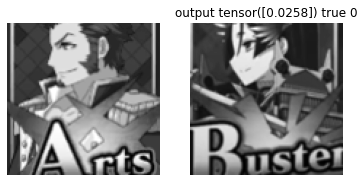

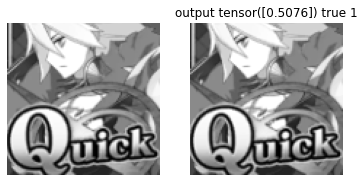

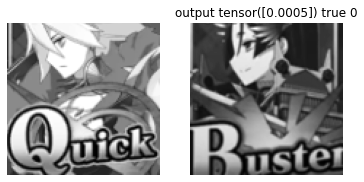

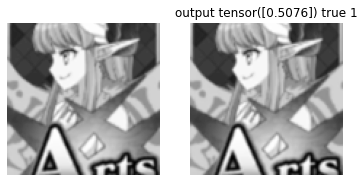

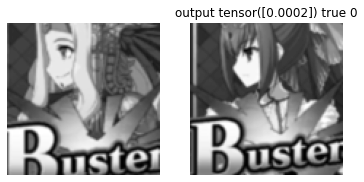

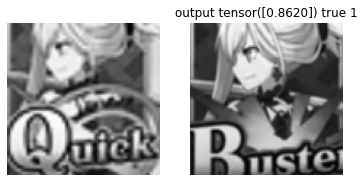

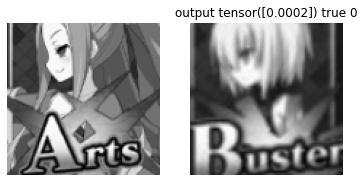

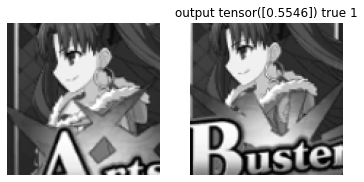

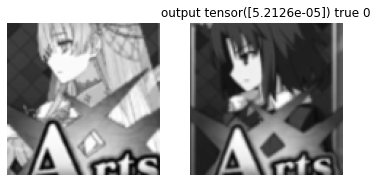

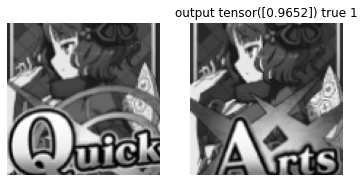

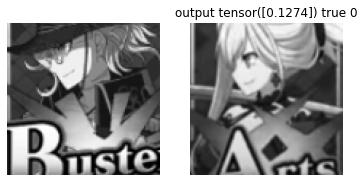

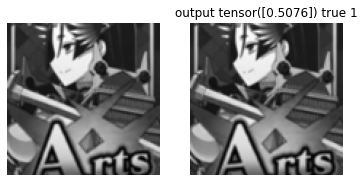

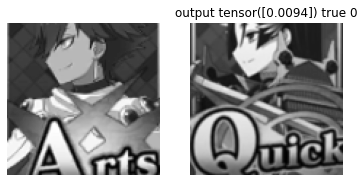

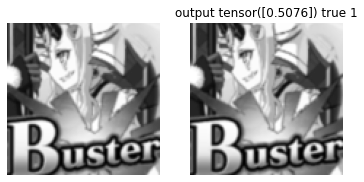

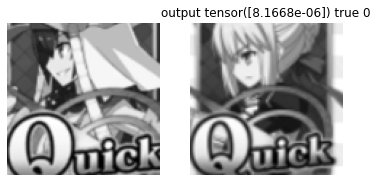

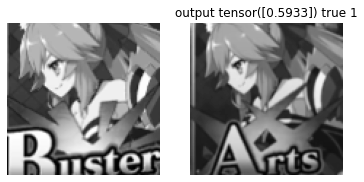

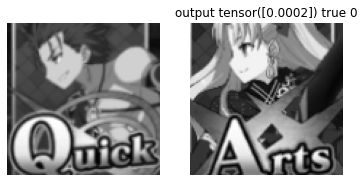

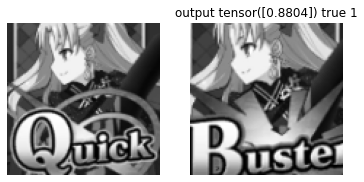

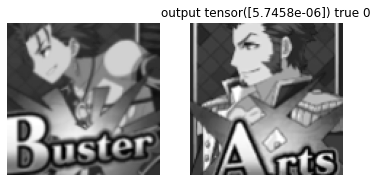

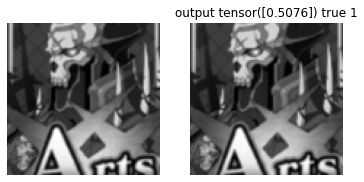

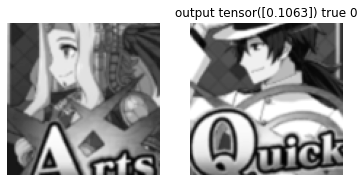

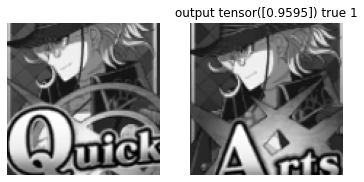

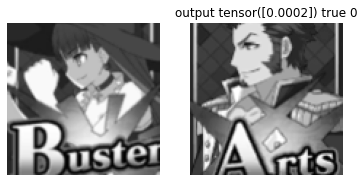

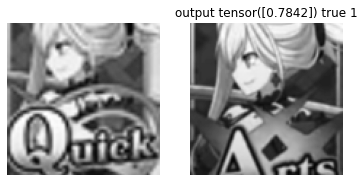

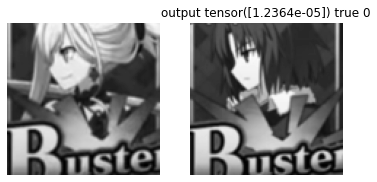

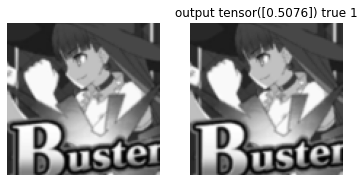

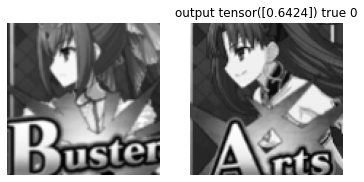

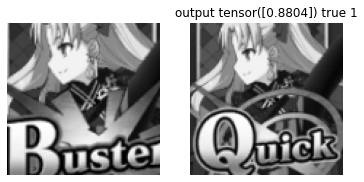

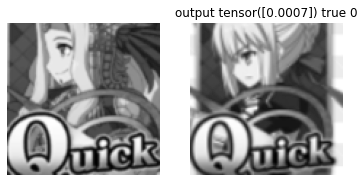

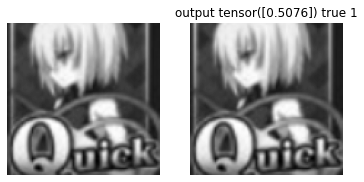

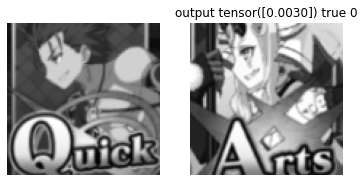

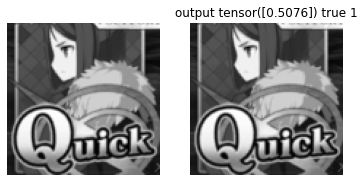

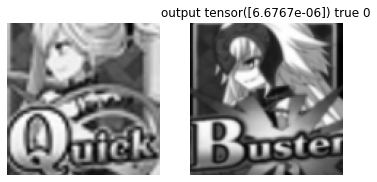

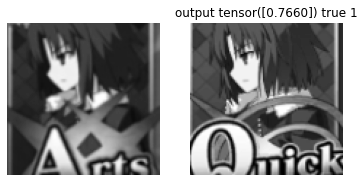

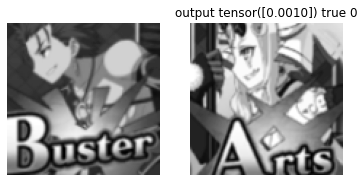

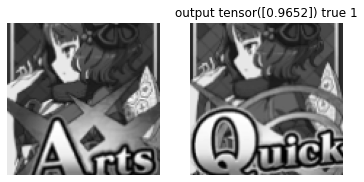

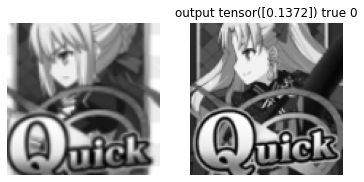

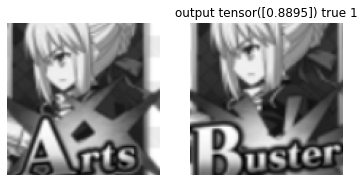

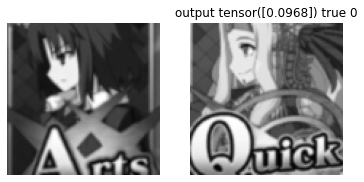

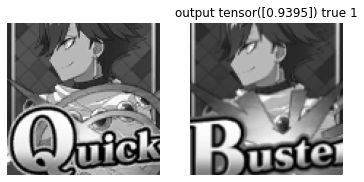

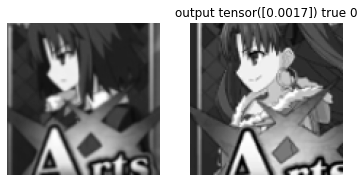

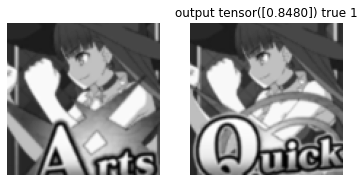

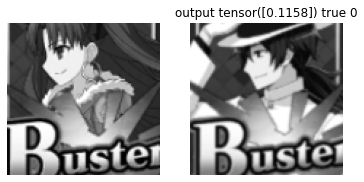

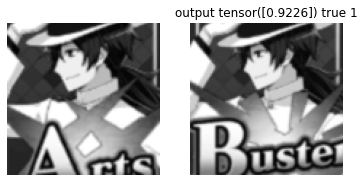

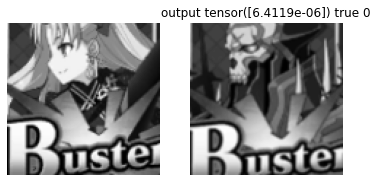

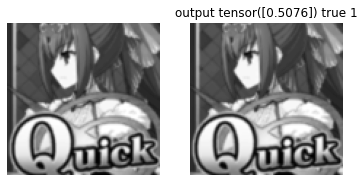

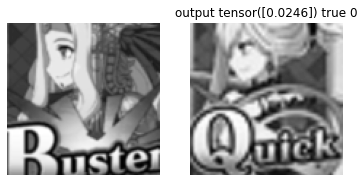

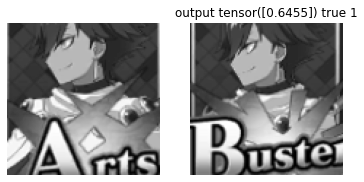

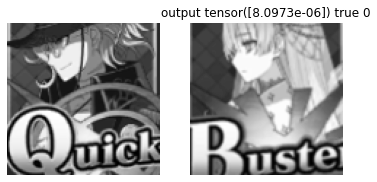

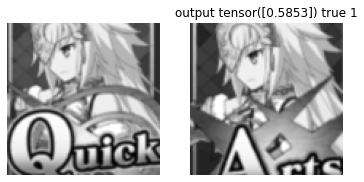

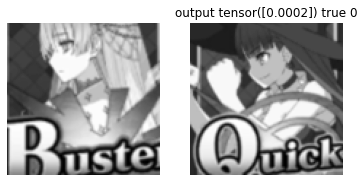

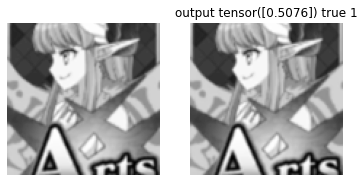

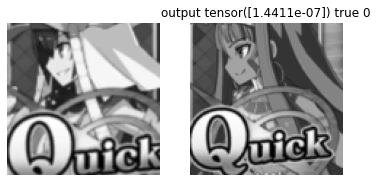

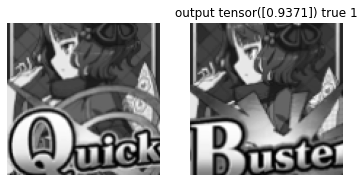

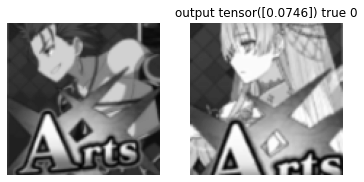

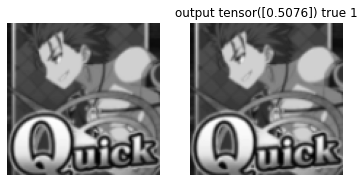

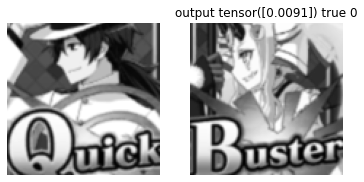

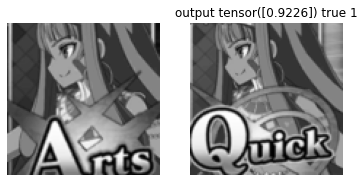

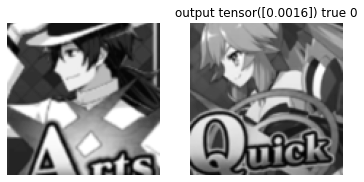

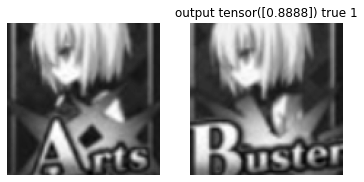

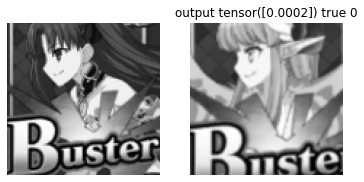

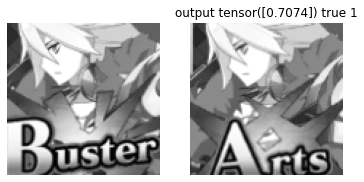

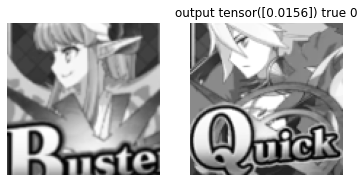

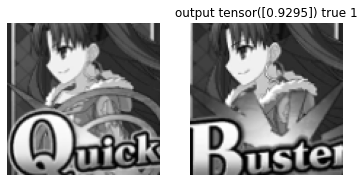

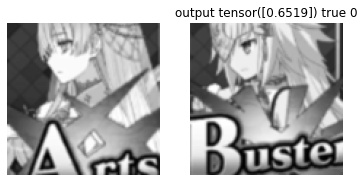

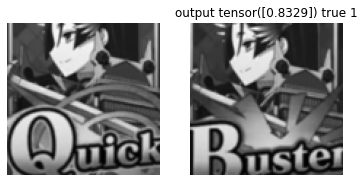

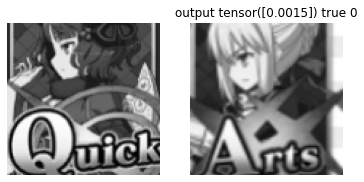

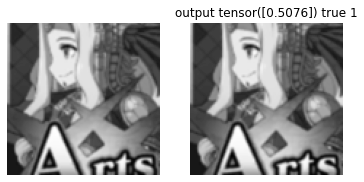

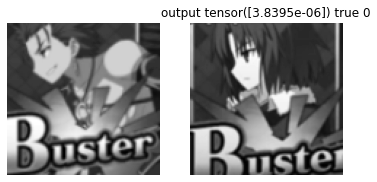

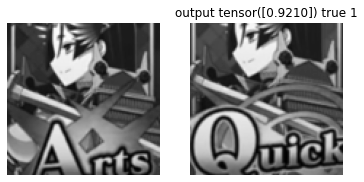

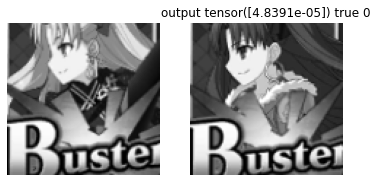

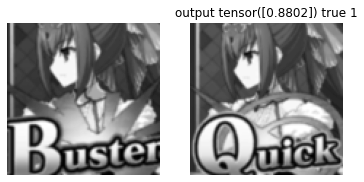

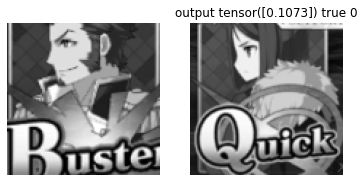

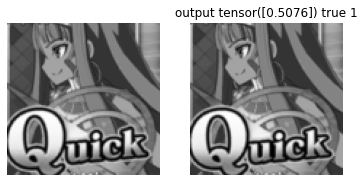

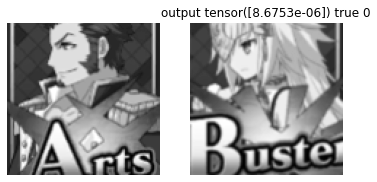

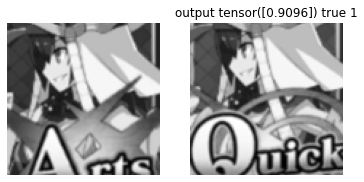

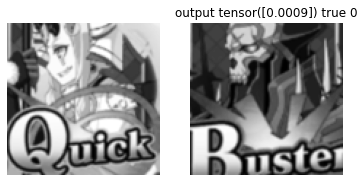

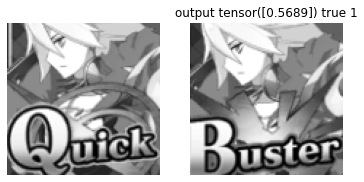

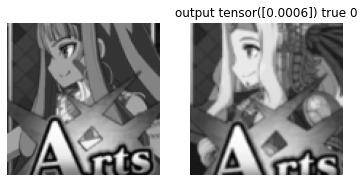

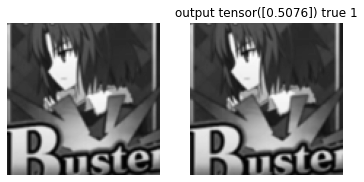

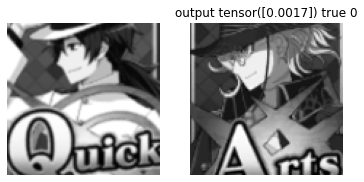

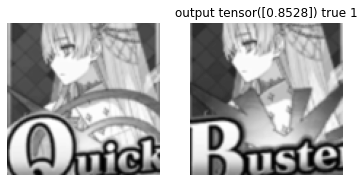

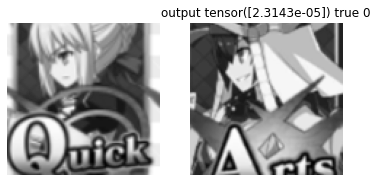

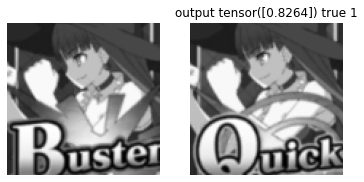

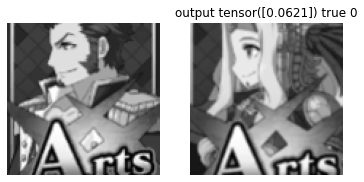

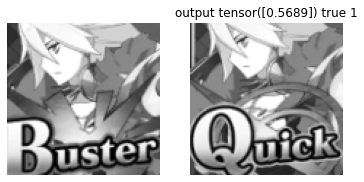

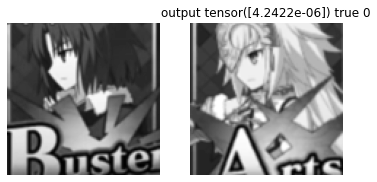

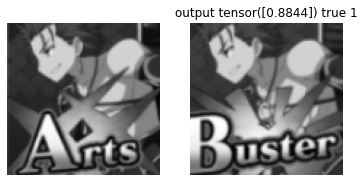

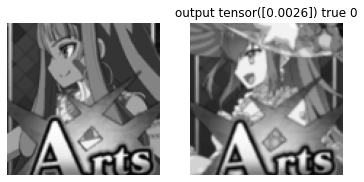

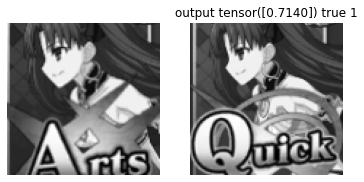

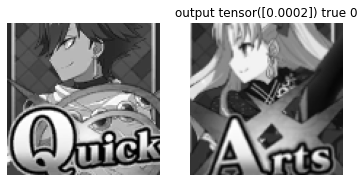

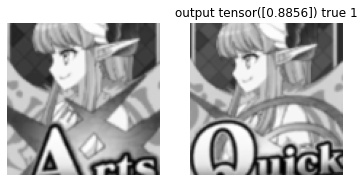

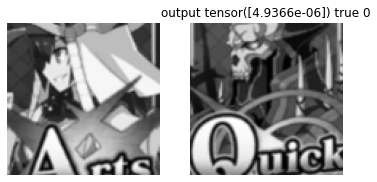

In [9]:
model.eval()
device = "cpu"
with torch.no_grad():
    for image1, image2, label, disp_img1, disp_img2 in testloader:
        image1 = image1.to(device)
        image2 = image2.to(device)
        label = label.to(device, non_blocking=True)

        # get output of model
        output = model(image1, image2)
        m = torch.nn.Sigmoid()
        sig_output = m(output)
        for i in range(image1.shape[0]):
            title = "output {} true {}".format(sig_output[i], label[i])
            plt.figure()
            ax = plt.subplot(1,2,1)
            plt.imshow(disp_img1[i], cmap="gray")
            plt.axis("off")
            ax = plt.subplot(1,2,2)
            plt.imshow(disp_img2[i], cmap="gray")
            plt.axis("off")
            plt.title(title)

torch.Size([8, 1])


tensor([0, 1, 0, 1, 0, 1, 0, 1])

tensor([0., 1., 0., 1., 1., 1., 0., 1.])

0.875


tensor([1.2717e-05, 5.0861e-01, 6.1972e-05, 5.0861e-01, 6.0360e-01, 5.0861e-01,
        2.2606e-02, 5.0861e-01])